In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [4]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

# Import Datasets


In [3]:
# load datasets
df = pd.read_csv('/content/drive/MyDrive/Belajar dibimbing.id/Dataset/ds_salaries.csv')

# DS_Salaries EDA

In [5]:
# @title Check the summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.shape

(3755, 11)

**Data Frame berjumlah sebanyak 3.755 row dan 11 kolom**

**Cleaning Data**

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**Drop the columns that are not needed**

In [8]:
df = df.drop(['salary_currency', 'salary'], axis = 1)

**Job Positions Analysis**

a. Determine number of unique values in the ‘job_title’ column

In [9]:
df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

b. Determine the top 10 Job Titles with the most no. of designations

In [10]:
df['job_title'].value_counts().head(10)

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

c. Determine the Top 10 Job Titles with the highest annual salaries

In [14]:
job_title_salary = df.groupby('job_title')['salary_in_usd'].mean()
job_title_salary = job_title_salary.sort_values().tail(10)
job_title_salary

job_title
Applied Scientist                     190264.482759
Data Science Manager                  191278.775862
Machine Learning Software Engineer    192420.000000
Principal Data Engineer               192500.000000
Director of Data Science              195140.727273
Principal Data Scientist              198171.125000
Data Analytics Lead                   211254.500000
Data Lead                             212500.000000
Cloud Data Architect                  250000.000000
Data Science Tech Lead                375000.000000
Name: salary_in_usd, dtype: float64

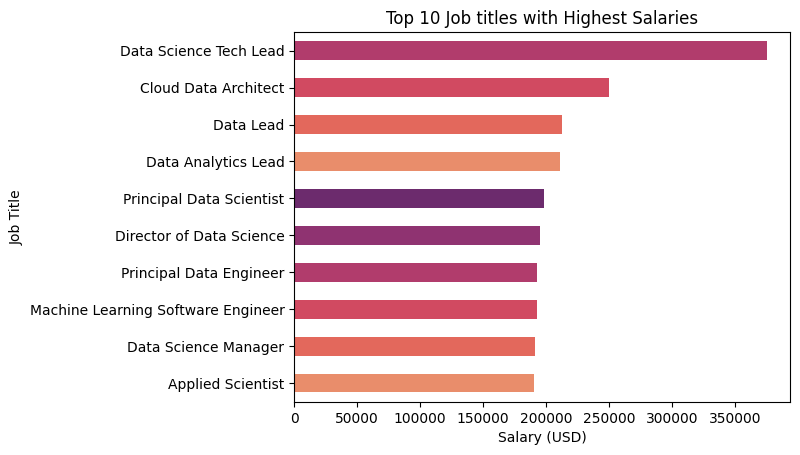

In [15]:
plt.figure()
job_title_salary.plot(kind='barh', color=sns.color_palette('flare'))
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 10 Job titles with Highest Salaries')
plt.show()

5. LOCATION

In [16]:
!pip install pycountry

# Converting the employee residence from ISO alpha 2 to ISO-3
import pycountry
df["ISO-3"] = [pycountry.countries.get(alpha_2=code).alpha_3
               for code in df["employee_residence"]]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 41.6 MB/s eta 0:00:00


Group the employee residences

In [17]:
employee_residence = df.groupby("ISO-3").size().reset_index(name="No. of Employees")
employee_residence.sort_values(by="No. of Employees", ascending=False, inplace=True)
employee_residence

,ISO-3,No. of Employees
75,USA,3004
29,GBR,167
12,CAN,85
25,ESP,80
37,IND,71
...,...,...
43,JEY,1
41,ISR,1
40,IRQ,1
33,HND,1


Identify the corresponding name of the countries and employee residences

In [18]:
df["Country"] = [pycountry.countries.get(alpha_2=code).name
                 for code in df["employee_residence"]]

# Grouping the employee residence

employee_residence = df.groupby("ISO-3").size().reset_index(name="No. of Employees")
employee_residence.sort_values(by="No. of Employees", ascending=False, inplace=True)
employee_residence

employee_residence['Country'] = [pycountry.countries.get(alpha_3=code).name
                                 for code in employee_residence['ISO-3']]

# Print the updated DataFrame
from tabulate import tabulate

print(tabulate(employee_residence, headers='keys', tablefmt='psql'))

+----+---------+--------------------+---------------------------------+
|    | ISO-3   |   No. of Employees | Country                         |
|----+---------+--------------------+---------------------------------|
| 75 | USA     |               3004 | United States                   |
| 29 | GBR     |                167 | United Kingdom                  |
| 12 | CAN     |                 85 | Canada                          |
| 25 | ESP     |                 80 | Spain                           |
| 37 | IND     |                 71 | India                           |
| 20 | DEU     |                 48 | Germany                         |
| 28 | FRA     |                 38 | France                          |
| 10 | BRA     |                 18 | Brazil                          |
| 63 | PRT     |                 18 | Portugal                        |
| 31 | GRC     |                 16 | Greece                          |
| 57 | NLD     |                 15 | Netherlands               

Visualize the distribution of population using geopandas

In [19]:
!pip install geopandas
import geopandas as gpd
import plotly.graph_objects as go

# Load the world map data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a choropleth map based on the count of employees in each country
fig = go.Figure(data=go.Choropleth(
    locations=employee_residence["ISO-3"],
    z=employee_residence["No. of Employees"],
    colorscale='plasma',
    locationmode="ISO-3",
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Count of Employees'
))

# Set the layout of the map
fig.update_layout(
    title="No. of Employees in different Countries",
    width=800,
    height=600,
    plot_bgcolor='white'  # assuming you have defined the 'background' variable elsewhere
)
# Show the map
fig.show()

<ipython-input-19-4d84c694a232>:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



6. COMPANY SIZE

a. Determine the population of employees per company size

In [20]:
group = df['company_size'].value_counts().sort_values()

fig = px.bar(x = group.index, y = group.values,
       color = group.index, text = group.values,
       title = 'No. of Employee per Company Size')

fig.update_layout( xaxis_title = "Company Size", yaxis_title = "No. of Employees")
fig.show()

b. Determine average salary range per company size

In [22]:
group = df.groupby('company_size')['salary_in_usd'].mean().sort_values()

fig = px.bar(x=group.index, y=group.values, color=group.index, text=group.values,
             title='Average Salary according to Company Size')

fig.update_layout(xaxis_title="Company Size", yaxis_title="Salary in USD")
fig.show()

7. SALARY ANALYSIS

a. Determine the average salaries per experience level

In [23]:
salary_per_exp = df.groupby('experience_level')['salary_in_usd'].mean()
salary_per_exp

experience_level
EN     78546.284375
EX    194930.929825
MI    104525.939130
SE    153051.071542
Name: salary_in_usd, dtype: float64

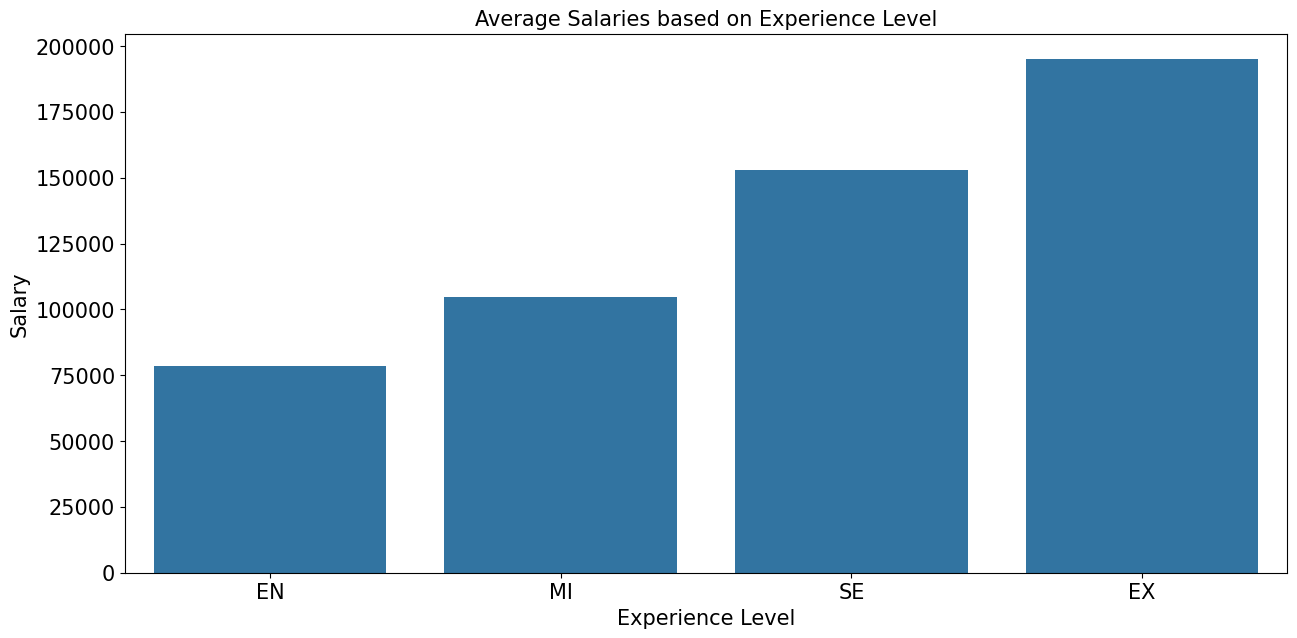

In [24]:
salary_per_exp = salary_per_exp.sort_values()

fig, ax = plt.subplots(figsize=(15, 7))
plt.title("Average Salaries based on Experience Level", size = 15)
plt.xlabel('Experience Level', size = 15)
plt.ylabel('Salary', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
sns.barplot(x=salary_per_exp.index, y=salary_per_exp)

plt.show()

Semakin berpengalaman maka gaji untuk data scientist semakin besar

b. Determine the salary distribution

In [25]:
salarymean = df['salary_in_usd'].mean()
salarymean

137570.38988015978

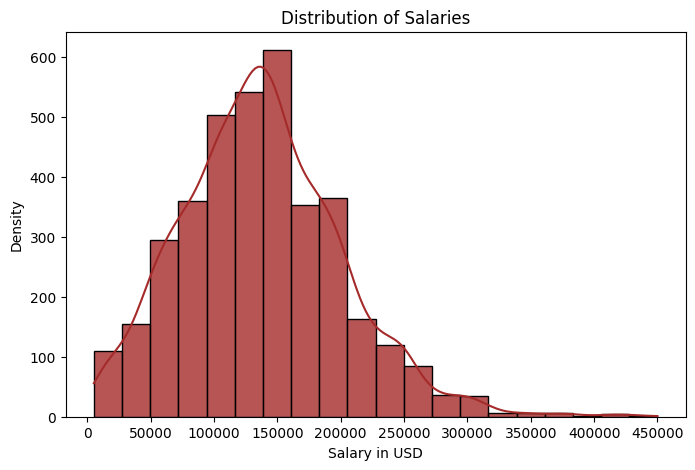

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salary_in_usd'], alpha=0.8, color='brown', bins=20, kde=True)
plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.xticks(range(0, 500000, 50000))
plt.title('Distribution of Salaries')
plt.show()

8. EXPERIENCE LEVEL

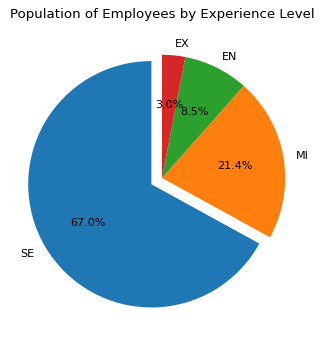

In [27]:
plt.figure(figsize=(6,5),dpi=80)

level_counts = df['experience_level'].value_counts()
explode = (0.1,0,0,0)
plt.pie(level_counts.values, labels=level_counts.index,
        autopct='%1.1f%%', startangle = 90,
        explode = explode)

plt.title('Population of Employees by Experience Level')


plt.show()

9. YEARLY PROGRESS

In [28]:
WY = df['work_year'].value_counts()
WY

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

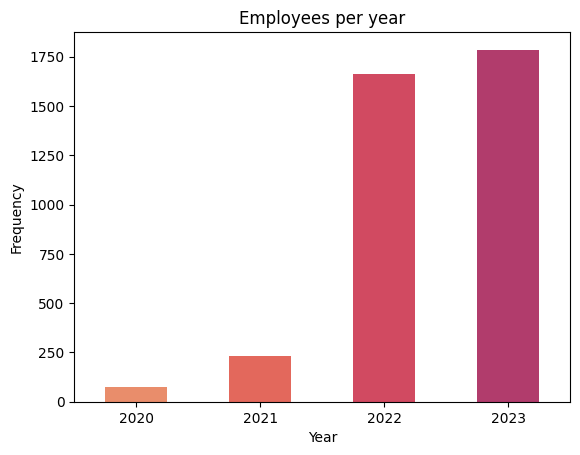

In [30]:
plt.figure()
WY.sort_values().plot(kind='bar', color=sns.color_palette('flare'))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Employees per year')
plt.xticks (rotation = 0 )
plt.show()

b. Determine the average salaries per year and remote ratio per year

In [31]:
def remote_ratio_year (df):
  year = df.groupby('work_year')
  remote = year.mean()
  return remote


remote_ratio_year(df)

<ipython-input-31-b413a34857b0>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,salary_in_usd,remote_ratio
work_year,,
2020,92302.631579,65.131579
2021,94087.208696,68.695652
2022,133338.620793,55.408654
2023,149045.541176,34.061625


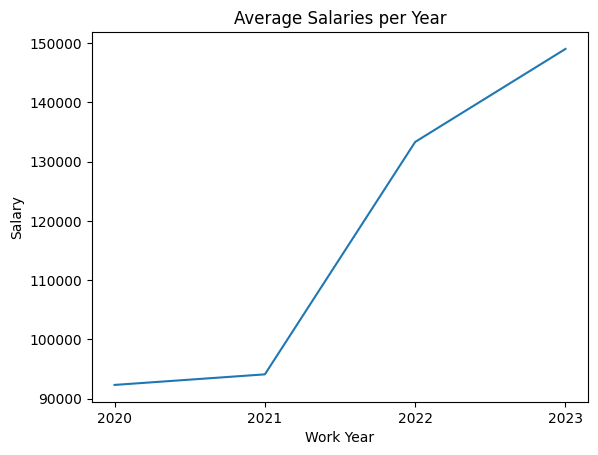

In [32]:
salary_per_year=np.array(df['salary_in_usd'].groupby(df['work_year']) .mean())
plt.title("Average Salaries per Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=salary_per_year)
plt.show()

setelah pandemic covid permintaan Data Scientist semakin meningkat

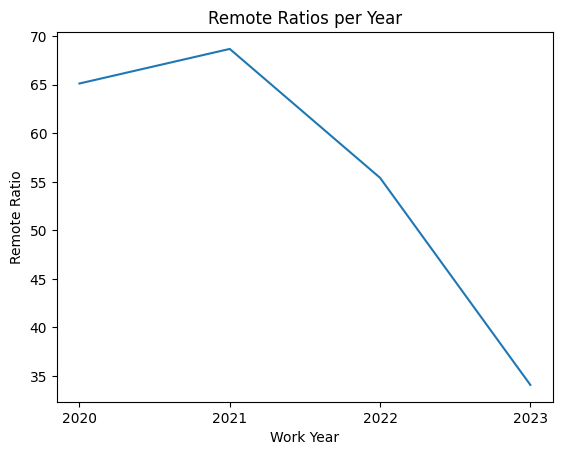

In [33]:
remote_per_year=np.array(df['remote_ratio'].groupby(df['work_year']).mean())
plt.title("Remote Ratios per Year")
plt.xlabel('Work Year')
plt.ylabel('Remote Ratio')
sns.lineplot(x=['2020', '2021', '2022','2023'], y=remote_per_year)
plt.show()

Disaat pandemic (tahun 2020) remote year (WFH) meningkat. Seiring berakhirnya pandemic remote ration semakin berkurang. Jadi pekerjaan data scientist sekarang lebih banyak WFO.

10. CORRELATION

a. Determine the correlation of full-time, part-time, freelancer, and contractual workers to salary in USD and remote ratio.

In [43]:
# Select relevant columns for analysis
selected_columns = ['work_year', 'salary_in_usd', 'remote_ratio', 'employment_type']

# Filter out rows with missing values in selected columns
filtered_data = df[selected_columns].dropna()

# Convert 'employment_type' to numeric values using one-hot encoding
filtered_data = pd.get_dummies(filtered_data, columns=['employment_type'])

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()

print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                    work_year  salary_in_usd  remote_ratio  \
work_year            1.000000       0.228290     -0.236430   
salary_in_usd        0.228290       1.000000     -0.064171   
remote_ratio        -0.236430      -0.064171      1.000000   
employment_type_CT  -0.050350      -0.019772      0.051829   
employment_type_FL  -0.050350      -0.070292      0.025238   
employment_type_FT   0.116310       0.118263     -0.068702   
employment_type_PT  -0.093825      -0.104864      0.041919   

                    employment_type_CT  employment_type_FL  \
work_year                    -0.050350           -0.050350   
salary_in_usd                -0.019772           -0.070292   
remote_ratio                  0.051829            0.025238   
employment_type_CT            1.000000           -0.002670   
employment_type_FL           -0.002670            1.000000   
employment_type_FT           -0.517998           -0.517998   
employment_type_PT           -0.003485           

b. Determine the correlation of the salary with different factors

<Axes: >

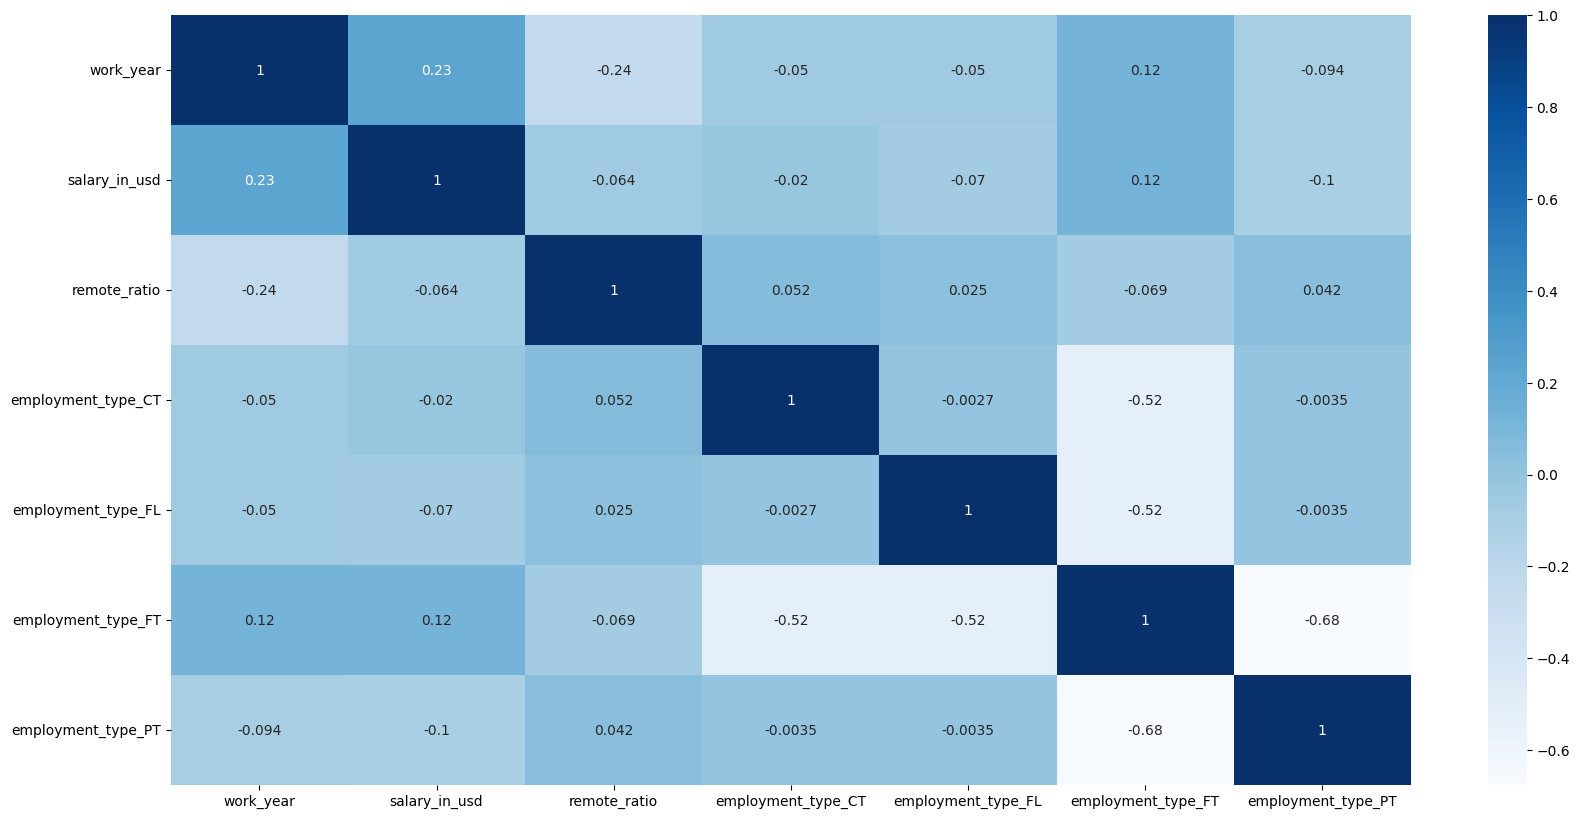

In [44]:
plt.figure(figsize = (20,10))
sns.heatmap(filtered_data.corr() , annot = True , cmap = "Blues")

## EDA Questions
1. What are Top 10 company_location with job_title "Data Scientist"?
2. What are Top 10 job_title with salary_in_usd?
3. What are Top 10 job_title with experience_level?
4. What are Top 10 company_size with salary_in_usd?
5. From what countries the job_title "Data Scientist" come? Which country has the high salary_in_usd?


In [46]:
# Filter the data for rows where the job title is "Data Scientist"
data_scientist_data = df[df['job_title'] == 'Data Scientist']

# Group by company location and count occurrences
location_counts = data_scientist_data['company_location'].value_counts()

# Get the top 10 company locations
top_10_locations = location_counts.head(10)

print("Top 10 company locations for the job title 'Data Scientist':")
print(top_10_locations)


Top 10 company locations for the job title 'Data Scientist':
US    674
GB     31
ES     28
CA     21
IN     15
FR     15
DE     14
IE      4
BR      4
NL      4
Name: company_location, dtype: int64


In [47]:
# Group the data by job_title and calculate the mean salary for each job_title
average_salary = df.groupby('job_title')['salary_in_usd'].mean()

# Sort the average salaries in descending order and select the top 10
top_10_job_salaries = average_salary.sort_values(ascending=False).head(10)

print("Top 10 job titles with salary in USD:")
print(top_10_job_salaries)


Top 10 job titles with salary in USD:
job_title
Data Science Tech Lead                375000.000000
Cloud Data Architect                  250000.000000
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Name: salary_in_usd, dtype: float64


In [48]:
job_title_salary = df.groupby('job_title')['salary_in_usd'].mean()
job_title_salary = job_title_salary.sort_values().tail(10)
job_title_salary

job_title
Applied Scientist                     190264.482759
Data Science Manager                  191278.775862
Machine Learning Software Engineer    192420.000000
Principal Data Engineer               192500.000000
Director of Data Science              195140.727273
Principal Data Scientist              198171.125000
Data Analytics Lead                   211254.500000
Data Lead                             212500.000000
Cloud Data Architect                  250000.000000
Data Science Tech Lead                375000.000000
Name: salary_in_usd, dtype: float64

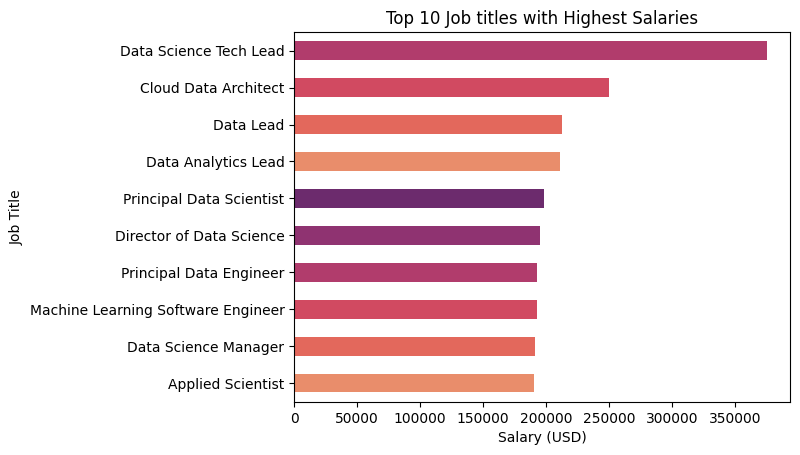

In [49]:
plt.figure()
job_title_salary.plot(kind='barh', color=sns.color_palette('flare'))
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 10 Job titles with Highest Salaries')
plt.show()

In [50]:
# Group the data by job_title and experience_level and count the occurrences
job_experience_counts = df.groupby(['job_title', 'experience_level']).size()

# Sort the counts in descending order and select the top 10
top_10_job_experience = job_experience_counts.sort_values(ascending=False).head(10)

print("Top 10 job titles with experience level:")
print(top_10_job_experience)


Top 10 job titles with experience level:
job_title                  experience_level
Data Engineer              SE                  718
Data Scientist             SE                  608
Data Analyst               SE                  380
Machine Learning Engineer  SE                  209
Data Engineer              MI                  205
Data Analyst               MI                  167
Data Scientist             MI                  161
Data Architect             SE                   92
Analytics Engineer         SE                   81
Data Engineer              EN                   66
dtype: int64


In [51]:
# Group the data by company_size and calculate the mean salary for each company_size
average_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()

# Sort the average salaries in descending order and select the top 10
top_10_company_size_salaries = average_salary_by_company_size.sort_values(ascending=False).head(10)

print("Top 10 company sizes with salary in USD:")
print(top_10_company_size_salaries)


Top 10 company sizes with salary in USD:
company_size
M    143130.548367
L    118300.982379
S     78226.682432
Name: salary_in_usd, dtype: float64


In [52]:
# Filter the data for rows where the job title is "Data Scientist"
data_scientist_data = df[df['job_title'] == 'Data Scientist']

# Group by country and calculate the average salary for each country
average_salary_by_company_location = data_scientist_data.groupby('company_location')['salary_in_usd'].mean()

# Find the country with the highest average salary
highest_salary_company_location = average_salary_by_company_location.idxmax()
highest_salary = average_salary_by_company_location.max()

print(f"The job title 'Data Scientist' originates from the following countries: {data_scientist_data['company_location'].unique()}")
print(f"The country with the highest average salary for 'Data Scientist' positions is {highest_salary_company_location} with an average salary of {highest_salary} USD.")


The job title 'Data Scientist' originates from the following countries: ['CA' 'US' 'HK' 'ES' 'GB' 'IE' 'CH' 'DE' 'IN' 'FR' 'BR' 'EE' 'LV' 'RO'
 'TH' 'HU' 'MX' 'AU' 'TR' 'NL' 'BE' 'ID' 'MY' 'PL' 'DZ' 'UA' 'NG' 'CL'
 'AT' 'IT' 'LU' 'IL']
The country with the highest average salary for 'Data Scientist' positions is US with an average salary of 158283.87537091988 USD.


In [53]:
# Group the data by job_title and calculate the mean salary for each job_title
average_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean()

# Find the job title with the highest average salary
highest_salary_job_title = average_salary_by_job_title.idxmax()
highest_salary = average_salary_by_job_title.max()

print(f"The job title that could potentially yield the highest salary is '{highest_salary_job_title}' with an average salary of {highest_salary} USD.")


The job title that could potentially yield the highest salary is 'Data Science Tech Lead' with an average salary of 375000.0 USD.


In [54]:
# Filter the data for rows where the job title is "Data Scientist"
data_scientist_data = df[df['job_title'] == 'Data Scientist']

# Find the maximum salary among the Data Scientist positions
max_salary_data_scientist = data_scientist_data['salary_in_usd'].max()

print(f"The maximum salary a Data Scientist could get is: {max_salary_data_scientist} USD.")


The maximum salary a Data Scientist could get is: 412000 USD.


In [55]:
# Group the data by experience_level and calculate the maximum salary for each experience level
max_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].max()

print("Highest salary for each experience level:")
print(max_salary_by_experience)


Highest salary for each experience level:
experience_level
EN    300000
EX    416000
MI    450000
SE    423834
Name: salary_in_usd, dtype: int64


In [56]:
# Filter the data for rows where the experience level is "EN"
entry_level_data = df[df['experience_level'] == 'EN']

# Count the occurrences of each job title within the filtered data
job_title_counts = entry_level_data['job_title'].value_counts()

# Find the job title with the most entry-level positions
most_common_job_title = job_title_counts.idxmax()
entry_level_count = job_title_counts.max()

print(f"The job title with the most entry-level positions is '{most_common_job_title}' with {entry_level_count} entries.")


The job title with the most entry-level positions is 'Data Engineer' with 66 entries.


In [57]:
# Filter the data for rows where the company size is "M"
medium_company_data = df[df['company_size'] == 'M']

# Count the occurrences of each job title within the filtered data
job_title_counts = medium_company_data['job_title'].value_counts()

# Find the most common job title in medium-sized companies
most_common_job_title = job_title_counts.idxmax()
job_title_count = job_title_counts.max()

print(f"The job title commonly found in medium-sized companies is '{most_common_job_title}' with {job_title_count} occurrences.")


The job title commonly found in medium-sized companies is 'Data Engineer' with 953 occurrences.
